In [2]:
from mario_replays.load_data import load_replay_data
import os
import pandas as pd
from mario_scenes.load_data import load_background_images
from mario_scenes.load_data import load_scenes_info
import pickle

sourcedata = '../sourcedata/'
outputdata = '../outputdata/'

In [4]:
clips_df = load_replay_data(os.path.join(sourcedata, 'scene_clips'), type='metadata')
clips_variables = load_replay_data(os.path.join(sourcedata, 'scene_clips'), type='variables')

repetitions_df = load_replay_data(os.path.join(sourcedata, 'replays'), type='metadata')
repetitions_variables = load_replay_data(os.path.join(sourcedata, 'replays'), type='variables')


In [3]:
## TODO : put UMAP code here

scenes_umap = pd.read_csv(os.path.join(outputdata, 'scenes_coordinates_umap.csv'))
scenes_umap

,scene_ID,World,Level,Scene,Enemy,2-Horde,3-Horde,4-Horde,Roof,Gap,...,Empty stair valley,Enemy stair valley,Gap stair valley,Reward,Moving platform,Flagpole,Beginning,Bonus zone,DR_1,DR_2
0,w1l1s0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,33.720116,-34.881977
1,w1l1s1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32.133860,-33.344692
2,w1l1s2,1,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32.238438,-30.521679
3,w1l1s3,1,1,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32.921875,-33.703980
4,w1l1s4,1,1,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,31.672804,-30.393167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,w8l3s7,8,3,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32.479065,-30.967434
309,w8l3s8,8,3,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32.836666,-33.866695
310,w8l3s9,8,3,9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32.948340,-33.856922
311,w8l3s10,8,3,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32.403824,-29.957445


In [4]:
# Load clusters

with open(os.path.join(outputdata, 'clusters.pkl'), 'rb') as f:
    clusters = pickle.load(f)
    clusters_df = pd.DataFrame(clusters)
    print(clusters_df.head())

                                                           0   \
index       [0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 3, 0, 0, 1, 3, ...   
n_clusters                                                  5   
summary     {0: {'n_scenes': 70, 'labels': [0.271428571428...   

                                                           1   \
index       [0, 1, 1, 1, 0, 2, 3, 3, 3, 3, 4, 0, 0, 1, 4, ...   
n_clusters                                                  6   
summary     {0: {'n_scenes': 70, 'labels': [0.271428571428...   

                                                           2   \
index       [0, 1, 2, 2, 0, 3, 4, 4, 4, 4, 5, 0, 0, 1, 5, ...   
n_clusters                                                  7   
summary     {0: {'n_scenes': 70, 'labels': [0.271428571428...   

                                                           3   \
index       [0, 1, 2, 2, 0, 3, 4, 4, 4, 4, 5, 0, 0, 1, 5, ...   
n_clusters                                                  8   
summary     {0: {'n_sc

In [6]:
def add_clusters_to_dataframe(df, clusters_dict):
    """
    Add cluster information from a dictionary to a dataframe.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The original dataframe to which columns will be added
    clusters_dict : dict
        Dictionary containing cluster information with structure similar to the provided example
        
    Returns:
    --------
    pandas.DataFrame
        The dataframe with added cluster columns
    """
    # Create a copy of the dataframe to avoid modifying the original
    result_df = df.copy()
    
    # Iterate through each item in the clusters_dict
    for col_idx, cluster_info in clusters_dict.items():
        # Extract the number of clusters
        n_clusters = cluster_info['n_clusters']
        
        # Extract the index array
        cluster_indices = cluster_info['index']
        
        # Create a column name based on the number of clusters
        column_name = f"{n_clusters} clusters"
        
        # Add the column to the dataframe
        # Note: We're assuming the indices in cluster_indices align with the dataframe rows
        # If the length doesn't match exactly, we'll need to handle that
        if len(cluster_indices) == len(result_df):
            result_df[column_name] = cluster_indices
        else:
            # Handle the case where lengths don't match
            # Here we're just padding with None if the cluster_indices is shorter
            # or truncating if it's longer
            padded_indices = cluster_indices + [None] * (len(result_df) - len(cluster_indices))
            result_df[column_name] = padded_indices[:len(result_df)]
            print(f"Warning: Length mismatch for {column_name}. Cluster indices: {len(cluster_indices)}, DataFrame rows: {len(result_df)}")
    
    return result_df

scenes_clustered = add_clusters_to_dataframe(scenes_umap, clusters)
scenes_clustered.head()

,scene_ID,World,Level,Scene,Enemy,2-Horde,3-Horde,4-Horde,Roof,Gap,...,21 clusters,22 clusters,23 clusters,24 clusters,25 clusters,26 clusters,27 clusters,28 clusters,29 clusters,30 clusters
0,w1l1s0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,w1l1s1,1,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,w1l1s2,1,1,2,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,w1l1s3,1,1,3,1,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
4,w1l1s4,1,1,4,0,1,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [ ]:
scenes_clustered.to_csv(os.path.join(outputdata, 'scenes_clustered.csv'), index=False)

In [85]:
clips_df = pd.read_csv(os.path.join(outputdata, 'clips_metadata.csv'))
clips_df['SceneFullName'] = [f'{clips_df["LevelFullName"].iloc[x]}s{str(clips_df["Scene"].iloc[x])}' for x in range(len(clips_df))]
clips_df

,Subject,World,Level,Duration,Cleared,ScoreGained,X_Traveled,Average_speed,Lives_lost,Hits_taken,...,EndFrame,TotalFrames,Bk2File,GameName,LevelFullName,SceneFullName,IndexInRun,IndexGlobal,IndexLevel,Phase
0,1,2,1,4.466667,False,50,82,18.358209,0,0,...,2082,5702,sub-01_ses-001_run-04_level-w2l1_scene-14_clip...,SuperMarioBros-Nes,w2l1,w2l1s14,5,38,5,discovery
1,1,1,2,2.433333,True,0,172,70.684932,0,0,...,1273,3098,sub-01_ses-001_run-02_level-w1l2_scene-0_clip-...,SuperMarioBros-Nes,w1l2,w1l2s0,5,16,5,discovery
2,1,1,2,3.066667,True,10,247,80.543478,0,0,...,1024,3090,sub-01_ses-001_run-02_level-w1l2_scene-1_clip-...,SuperMarioBros-Nes,w1l2,w1l2s1,1,12,1,discovery
3,1,1,3,3.550000,True,0,157,44.225352,0,0,...,1377,2597,sub-01_ses-001_run-03_level-w1l3_scene-5_clip-...,SuperMarioBros-Nes,w1l3,w1l3s5,8,29,8,discovery
4,1,1,3,6.050000,False,0,156,25.785124,0,0,...,2527,2528,sub-01_ses-001_run-03_level-w1l3_scene-6_clip-...,SuperMarioBros-Nes,w1l3,w1l3s6,1,22,1,discovery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56136,6,8,2,0.900000,True,0,132,146.666667,0,0,...,3821,6729,sub-06_ses-025_run-05_level-w8l2_scene-3_clip-...,SuperMarioBros-Nes,w8l2,w8l2s3,2,608,27,practice
56137,6,5,2,14.300000,True,100,189,13.216783,0,0,...,3609,8074,sub-06_ses-025_run-01_level-w5l2_scene-10_clip...,SuperMarioBros-Nes,w5l2,w5l2s10,1,585,30,practice
56138,6,8,2,2.016667,True,0,159,78.842975,0,0,...,842,6729,sub-06_ses-025_run-05_level-w8l2_scene-2_clip-...,SuperMarioBros-Nes,w8l2,w8l2s2,2,608,27,practice
56139,6,5,3,2.400000,True,0,126,52.500000,0,0,...,277,5862,sub-06_ses-025_run-02_level-w5l3_scene-0_clip-...,SuperMarioBros-Nes,w5l3,w5l3s0,2,591,26,practice


In [133]:
import numpy as np
# Add cluster information to clips_df


## Get clusters columns
clusters_columns = [col for col in scenes_clustered.columns if 'clusters' in col]
## Merge the clusters information into the clips_df, matching the values of 'SceneFullName' and 'scene_ID'
clips_df['scene_idx'] = [np.argwhere(scenes_clustered['scene_ID'] == scene)[0][0] for scene in clips_df['SceneFullName']]

## Add new columns to clips_df, based on the value of scene_idx to find the corresponding cluster in scenes_clustered. Do it for each cluster column
for col in clusters_columns:
    clips_df[col] = [scenes_clustered[col].iloc[clips_df['scene_idx'].iloc[x]] for x in range(len(clips_df))]

# Add a new column for a manual clustering
manual_clusters = ['None'] * len(clips_df)
stairs_gap_scenes = ['w5l2s4', 'w5l2s14', 'w6l1s10', 'w8l1s26', 'w8l2s1', 'w8l2s17', 'w8l3s11']
for idx_clip, scene in enumerate(clips_df['SceneFullName']):
    if scene in stairs_gap_scenes:
        manual_clusters[idx_clip] = 'stairs_gap'
clips_df['manual_clusters'] = manual_clusters
clips_df['manual_clusters']

0        None
1        None
2        None
3        None
4        None
         ... 
56136    None
56137    None
56138    None
56139    None
56140    None
Name: manual_clusters, Length: 56141, dtype: object

In [128]:
np.unique(manual_clusters)

array([0, 1])

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_moving_average_simple(df, variable_col, index_col, grouping_col, filter_col, filter_value, figsize=(12, 6), window_size=5):
    """
    Plots a moving average of a variable for a specific filter value, grouped by another column.
    The x-axis is the rank-order of observations (0, 1, 2, ...) regardless of original index_col values.

    Args:
        df (pd.DataFrame): Your input DataFrame.
        variable_col (str): The column name of the variable to plot (Y-axis).
        index_col (str): The column name used to sort each group (but not shown on x-axis).
        grouping_col (str): The column name to group by and color lines (e.g., 'Subject').
        filter_col (str): The column name to filter by (e.g., 'LevelFullName').
        filter_value (str or int): The specific value to keep in the filter_col.
        window_size (int, optional): The window size for the moving average. Defaults to 5.

    Raises:
        ValueError: If required columns are missing or filter_value yields no data.
        TypeError: If variable_col is not numeric.
    """
    # --- Input Validation ---
    required_cols = [variable_col, index_col, grouping_col, filter_col]
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing required columns: {', '.join(missing_cols)}")

    if not pd.api.types.is_numeric_dtype(df[variable_col]):
        raise TypeError(f"Variable column '{variable_col}' must be numeric.")

    # --- Data Filtering ---
    filtered_df = df[df[filter_col] == filter_value].copy()
    if filtered_df.empty:
        raise ValueError(f"No data found for filter value '{filter_value}' in column '{filter_col}'.")

    # --- Plotting ---
    plt.figure(figsize=figsize)
    unique_groups = sorted(filtered_df[grouping_col].unique())
    colors = sns.color_palette("Set2", n_colors=len(unique_groups))

    plot_successful = False
    for i, group_value in enumerate(unique_groups):
        group_df = filtered_df[filtered_df[grouping_col] == group_value].copy()
        group_df = group_df.sort_values(index_col).reset_index(drop=True)
        group_df["relative_x"] = range(len(group_df)) 

        if group_df.empty:
            continue

        # Calculate and plot moving average or raw data
        if len(group_df) >= window_size:
            moving_avg = group_df[variable_col].rolling(window=window_size, min_periods=window_size).mean()
            plt.plot(group_df["relative_x"], moving_avg, label=f"{grouping_col} {group_value}", color=colors[i])#, marker='.')
            plot_successful = True
        else:
            print(f"Warning: Not enough data points (found {len(group_df)}, need {window_size}) for {grouping_col} {group_value}. Plotting raw data.")
            plt.plot(group_df["relative_x"], group_df[variable_col], label=f"{grouping_col} {group_value} (Raw)", color=colors[i], marker='.', linestyle='--')
            plot_successful = True

    # --- Final Plot Setup ---
    if plot_successful:
        plt.xlabel("Order")
        plt.ylabel(f"Moving Average of {variable_col} (Window={window_size})")
        plt.title(f"Moving Average of {variable_col} for {filter_col} = {filter_value}\nGrouped by {grouping_col}")
        #plt.legend(title=grouping_col.capitalize())
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid data points found to plot for filter value '{filter_value}'.")
        plt.close()


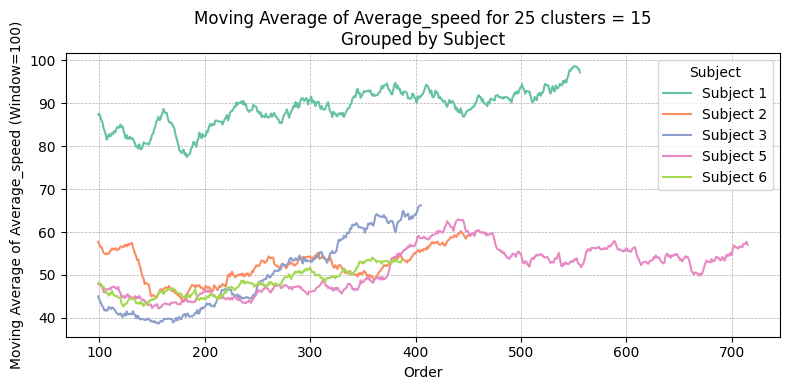

In [96]:
## Make plot for CLUSTER

scene_clusters = pd.read_csv(os.path.join(outputdata, 'scenes_clustered.csv'))

plot_moving_average_simple(
    df=clips_df,
    variable_col='Average_speed',
    index_col='ClipCode',      # Use the exact column name from your repetitions_df
    grouping_col='Subject',
    filter_col='25 clusters', # Use the exact column name
    filter_value=15,
    window_size=100,
    figsize=(8,4)
)

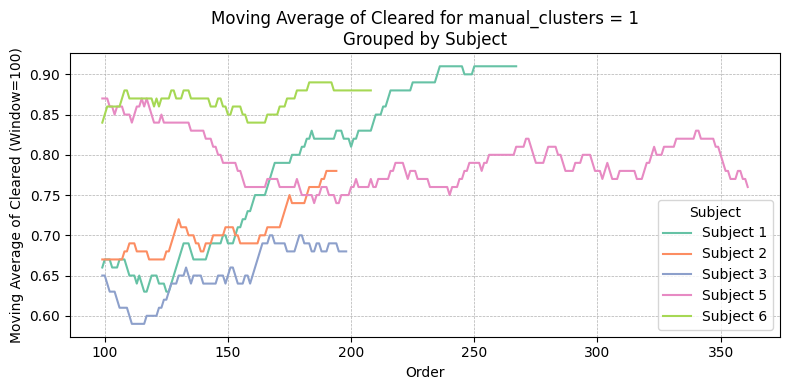

In [132]:
plot_moving_average_simple(
    df=clips_df,
    variable_col='Cleared',
    index_col='ClipCode',      # Use the exact column name from your repetitions_df
    grouping_col='Subject',
    filter_col='manual_clusters', # Use the exact column name
    filter_value=1,
    window_size=100,
    figsize=(8,4)
)

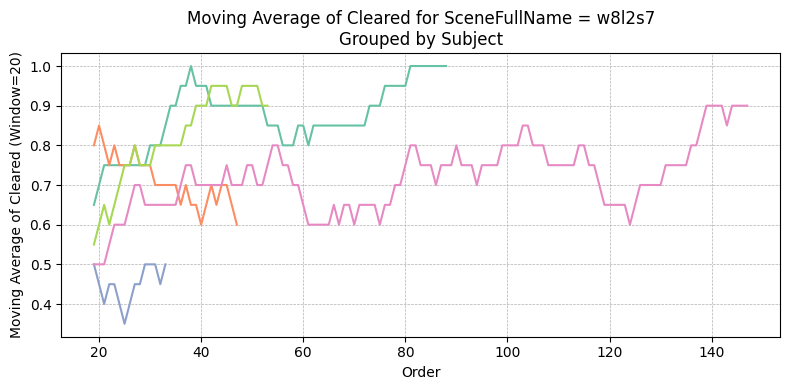

In [166]:
plot_moving_average_simple(
    df=clips_df,
    variable_col='Cleared',
    index_col='ClipCode',      # Use the exact column name from your repetitions_df
    grouping_col='Subject',
    filter_col='SceneFullName', # Use the exact column name
    filter_value='w8l2s7',
    window_size=20,
    figsize=(8,4)
)